# 第3週：傲慢與偏見情緒分析
**Author:** 黃天原<br>
**Date created:** 2021/09/30<br>
**Last modified:** 2021/09/30<br>
本週課程為「情緒分析1」，目的為了解lexicon-base 情緒分析。情緒分析步驟會因所要分析之語言不同而有所差異，在這個Jupyter Notebook當中將會展示「英文」的情緒分析，並且搭配python程式碼進行講解。在後面的內容中，我們將會介紹所使用到的套件、資料前處理、lexicon-base 情緒分析

## 大綱
+ 1. 套件說明
+ 2. 資料前處理
    + 2.1 基本資料介紹
    + 2.2 資料清理
    + 2.3 文章斷詞
+ 3. lexicon-base 情緒分析
    + 3.1 準備LIWC情緒字典
    + 3.2 情緒字典與斷詞結果進行合併
    + 3.3 正負向情緒分數聲量折線圖圖
    + 3.4 正負向情緒分數比例折線圖圖
    + 3.5 文字雲
    + 3.6 情緒代表字
    + 3.7 情緒關鍵字

## 1. 套件說明
下面列出在本次實作過程中我們所使用到的相關套件，在這個Jupyter Notebook當中我們將會簡單的展示這些套件的使用方式，關於各個套件的進階使用請同學參照其官網的說明。
- pandas: 一個資料分析的函式庫，提供了DataFrame等資料格式，與資料處理的函數。
- NLTK: 全名為Natural Language Tool Kit，自然語言處理工具。
- re: 正規表達式套件。
- wordcloud: 文字雲繪圖工具。
- matplotlib: 繪圖工具。

In [1]:
# 安裝會使用到的套件
# %pip install wordcloud

In [2]:
# 確認當前工作目錄
%pwd

'/home/evan19983314/2022_summer_training'

In [4]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download("punkt") # 下載需要用到的語料庫
%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     /home/evan19983314/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 3. lexicon-base 情緒分析
進行基於情緒字典的情緒分析，首先需要準備情緒字典後再將字典與斷詞後的文章進行合併

### 3.1 準備LIWC情緒字典與清理完成的傲慢與偏見
- 全名Linguistic Inquiry and Word Counts，由心理學家Pennebaker於2001出版  
- 分為正向情緒與負向情緒

In [5]:
# 讀取情緒字典


,word,sentiments
0,abnormal,negative
1,abolish,negative
2,abominable,negative
3,abominably,negative
4,abominate,negative
...,...,...
6781,youthful,positive
6782,zeal,positive
6783,zenith,positive
6784,zest,positive


In [7]:
## 讀入清理過的傲慢與偏見


,Unnamed: 0,sentence,chapter,token,word,stem_token,lemma_token
0,0,TPRIDE PREJUDICE,0,TPRIDE,tpride,tpride,tpride
1,0,TPRIDE PREJUDICE,0,PREJUDICE,prejudice,prejudic,prejudice
2,0,It is a truth universally acknowledged that a ...,1,truth,truth,truth,truth
3,0,It is a truth universally acknowledged that a ...,1,universally,universally,univers,universally
4,0,It is a truth universally acknowledged that a ...,1,acknowledged,acknowledged,acknowledg,acknowledged


### 3.2 情緒字典與斷詞結果進行合併
將情緒字典與斷詞結果進行合併。

,Unnamed: 0,sentence,chapter,token,word,stem_token,lemma_token,sentiments
0,0,TPRIDE PREJUDICE,0,TPRIDE,tpride,tpride,tpride,NaN
1,0,TPRIDE PREJUDICE,0,PREJUDICE,prejudice,prejudic,prejudice,negative
2,0,It is a truth universally acknowledged that a ...,1,truth,truth,truth,truth,NaN
3,0,It is a truth universally acknowledged that a ...,1,universally,universally,univers,universally,NaN
4,0,It is a truth universally acknowledged that a ...,1,acknowledged,acknowledged,acknowledg,acknowledged,NaN


In [9]:
# 算出每章情緒總和(sentiment_count)


,chapter,sentiments,size
0,0,negative,1
1,1,negative,22
2,1,positive,26
3,2,negative,17
4,2,positive,16


### 3.3 正負向情緒分數聲量長條
分別畫出文集中，正向（positive）與負向（negative）情緒的折線圖

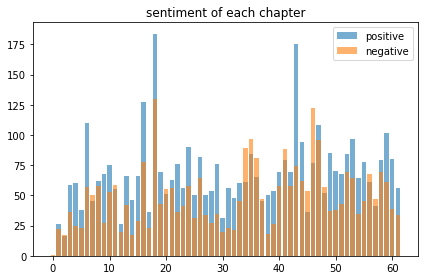

,chapter,sentiments,size
36,18,positive,184
86,43,positive,175
32,16,positive,127
12,6,positive,110
94,47,positive,108
...,...,...,...
34,17,positive,36
60,30,positive,31
24,12,positive,26
2,1,positive,26


畫出每章的情緒總分數，可以看到正向情緒在 18 與 43 章較高

### 3.4 正負向情緒分數比例折線圖圖

,chapter,sentiments,size,ratio
0,0,negative,1,1.000000
1,1,negative,22,0.458333
2,1,positive,26,0.541667
3,2,negative,17,0.515152
4,2,positive,16,0.484848


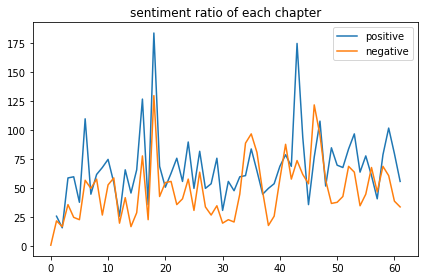

### 3.4 文字雲
針對不同章節畫出該章的文字雲，如果文字雲中的字詞大小越大，代表出現頻率越高

### 第 43 章


In [14]:
# 計算不同章節的詞頻


,chapter,word,size
0,0,prejudice,1
1,0,tpride,1
2,1,abuse,1
3,1,account,1
4,1,acknowledged,1
...,...,...,...
37623,61,years,1
37624,61,yet,2
37625,61,young,1
37626,61,younger,1


In [52]:
### 找出第 43 章的正向字詞頻


,word,size
24401,elizabeth,34
24781,mr,21
24782,mrs,19
24756,might,15
24512,gardiner,14


In [59]:
## wordcloud 的 input 是一個 dict, key是 word, value 是次數
wc_43['master']

10

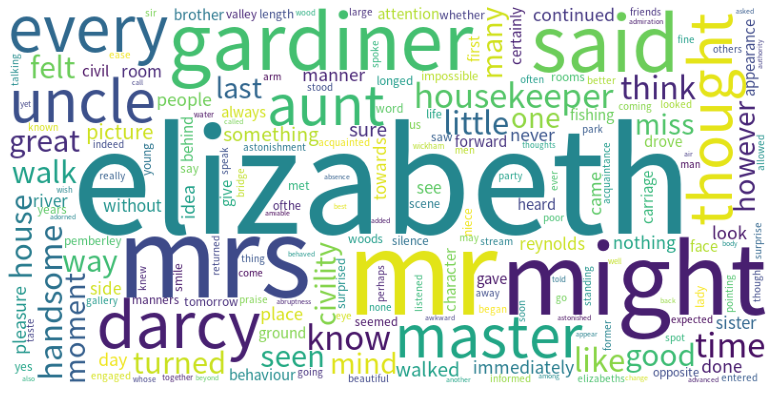

In [39]:
font = './SourceHanSansTW-Regular.otf' #中文字型路徑


### 3.5 情緒代表字
從整個文集中計算出正負向情緒字的出現詞頻，並找出情緒的代表字

,word,sentiments,size
785,miss,negative,246
1275,well,positive,189
521,good,positive,152
538,great,positive,117
401,enough,positive,88


Text(0.5, 0, 'count')

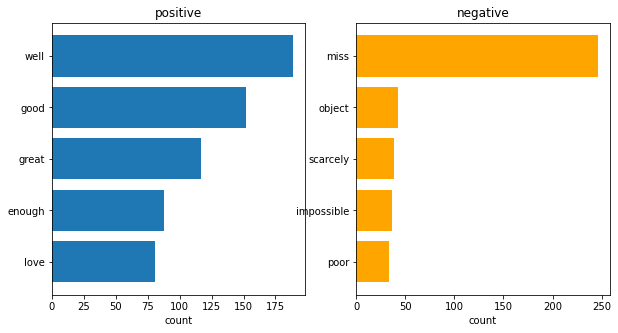

另外，也可以依據不同章節觀察情緒代表字的變化
### ch.43 正負向情緒代表字

In [43]:
#篩選章節


,chapter,word,sentiments,size
3139,38,great,positive,4
3147,38,kindness,positive,4
3143,38,humble,positive,3
3165,38,well,positive,2
3136,38,grateful,positive,2


Text(0.5, 0, 'count')

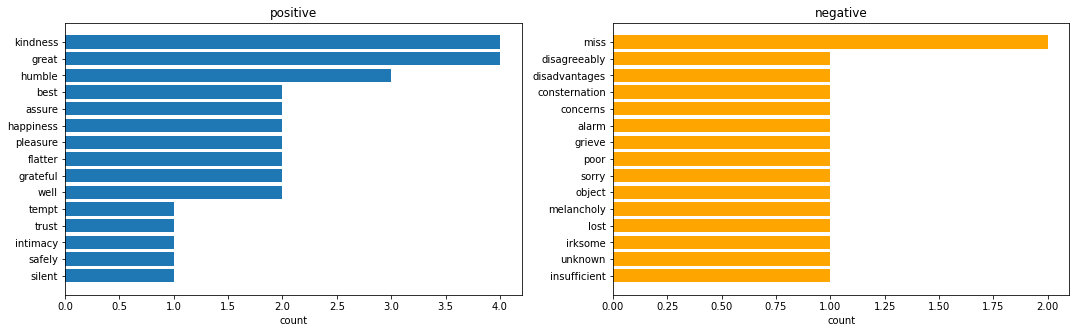

## 3.6 歸類正負面句子
- 之前的情緒分析大部分是章節的詞彙全部加總，接下來將正負面情緒的句子分開，看看能不能發現一些新的東西。  
- 接下來歸類章節，將每一章句子正負面情緒的分數算出來，然後大概分類句子屬於正面還是負面。

In [24]:
data_liwc.head()

,Unnamed: 0,sentence,chapter,token,word,stem_token,lemma_token,sentiments
0,0,TPRIDE PREJUDICE,0,TPRIDE,tpride,tpride,tpride,NaN
1,0,TPRIDE PREJUDICE,0,PREJUDICE,prejudice,prejudic,prejudice,negative
2,0,It is a truth universally acknowledged that a ...,1,truth,truth,truth,truth,NaN
3,0,It is a truth universally acknowledged that a ...,1,universally,universally,univers,universally,NaN
4,0,It is a truth universally acknowledged that a ...,1,acknowledged,acknowledged,acknowledg,acknowledged,NaN


,sentence,chapter,sentiments,size
0,Good gracious,59,positive,2
1,It may be easily b...,47,negative,1
2,It may be easily b...,47,positive,2
3,The surprise of th...,57,positive,2
4,They did not see t...,54,positive,2
...,...,...,...,...
4573,yes said Elizabeth drilyMr Darcy is uncommonly...,33,positive,1
4574,yesI understand you perfectly,9,positive,1
4575,yesit would be much better towait till Jane wa...,9,positive,2
4576,you are a great deal too apt you know to like ...,4,positive,2


sentiments,sentence,negative,positive
0,Good gracious,0,2
1,It may be easily b...,1,2
2,The surprise of th...,0,2
3,They did not see t...,0,2
4,A clear tenthousand per annum,0,1


In [60]:
# 如果該句子的正面情緒大於負面情緒，則歸類該句子為正面(positive)，反之則歸類為負面(negative)


sentiments,sentence,negative,positive,type
0,Good gracious,0,2,positive
1,It may be easily b...,1,2,positive
2,The surprise of th...,0,2,positive
3,They did not see t...,0,2,positive
4,A clear tenthousand per annum,0,1,positive


,type,size
0,negative,1713
1,positive,1811


### 正負情緒句子數量統計圖

,sentence,negative,positive,type,chapter
0,Good gracious,0,2,positive,59
1,It may be easily b...,1,2,positive,47
2,The surprise of th...,0,2,positive,57
3,They did not see t...,0,2,positive,54
4,A clear tenthousand per annum,0,1,positive,16


,chapter,type,size
0,0,negative,1
1,1,negative,16
2,1,positive,15
3,2,negative,13
4,2,positive,13
...,...,...,...
118,59,positive,56
119,60,negative,15
120,60,positive,37
121,61,negative,14


Text(0.5, 0, 'count')

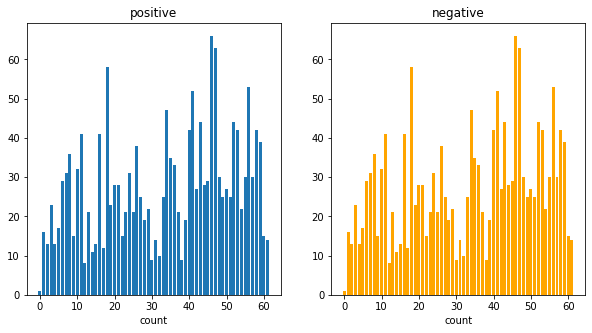